<a href="https://colab.research.google.com/github/LataData/WineDatasetAnalysis/blob/main/Wine_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.decomposition import PCA

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wine_dataset_project/winequality-red.csv')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.shape

(1599, 12)

In [10]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [11]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


# Checking for duplicated values and deleting them

In [12]:
df.duplicated().sum()

240

In [13]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [14]:
df.drop_duplicates(keep='first',inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(1359, 12)

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#Checking distribution of all columns and skewness

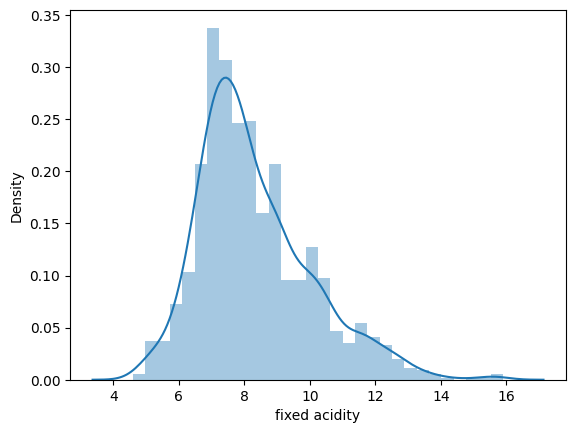

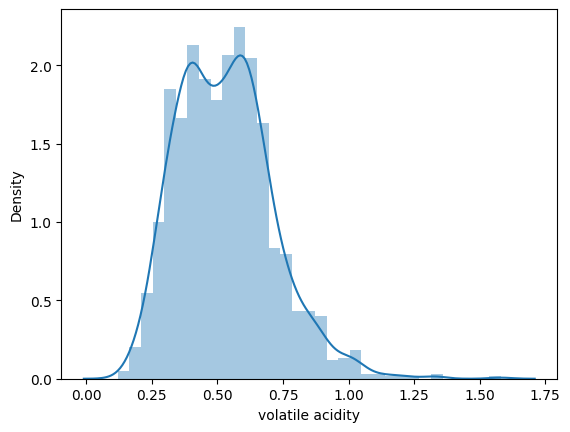

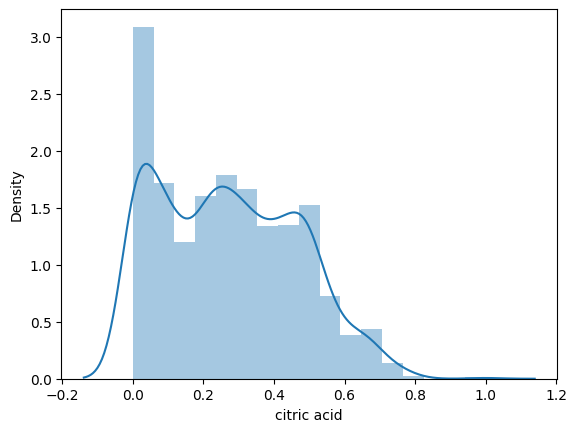

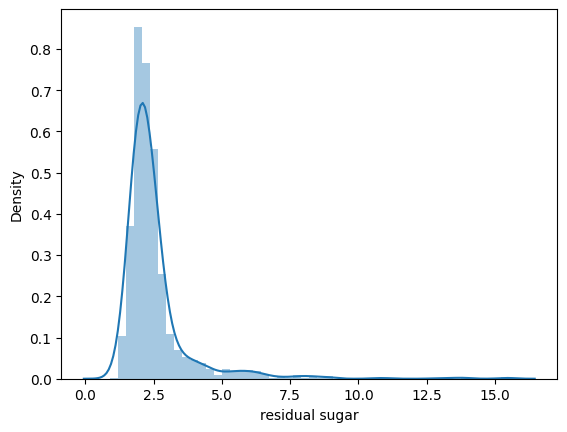

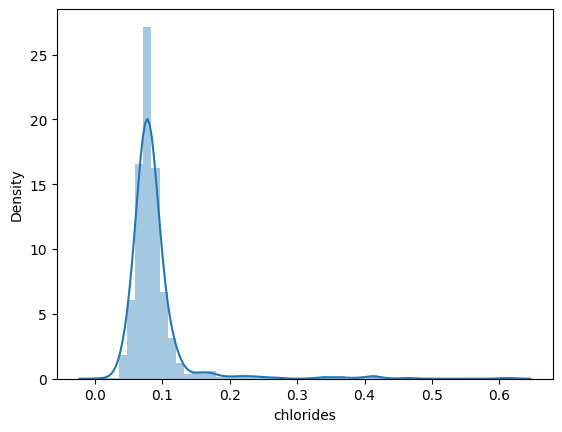

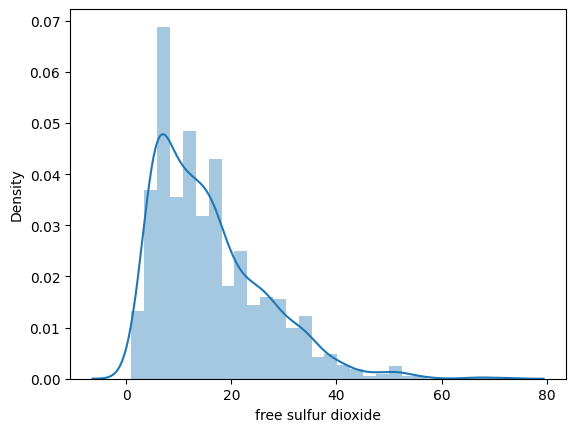

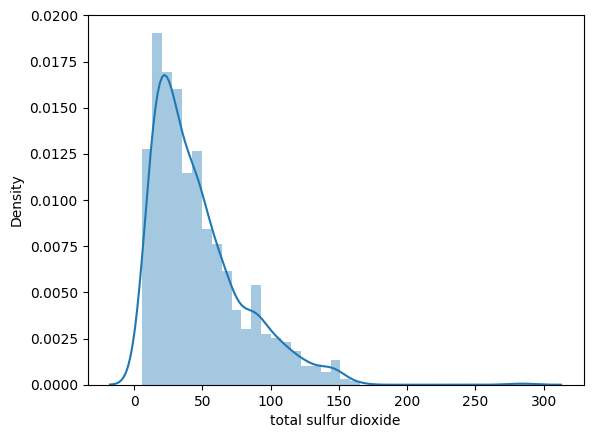

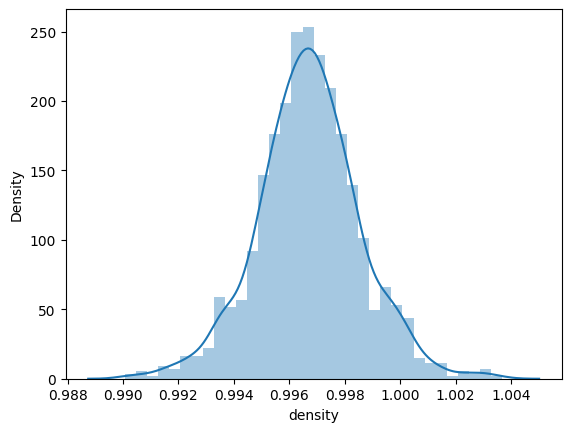

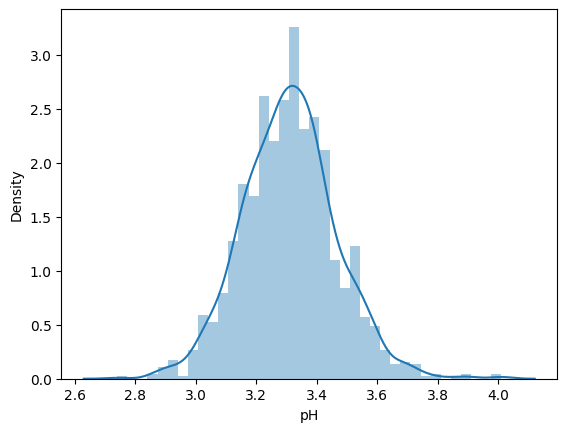

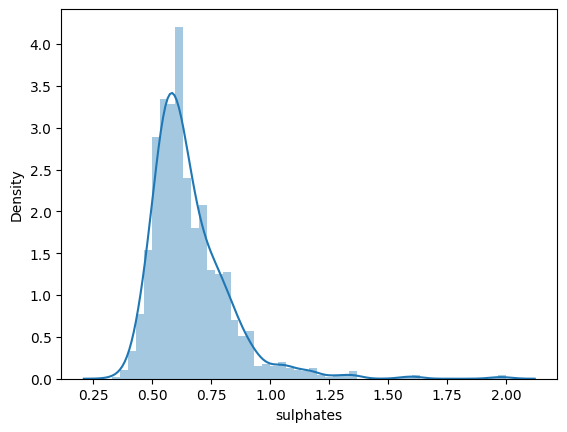

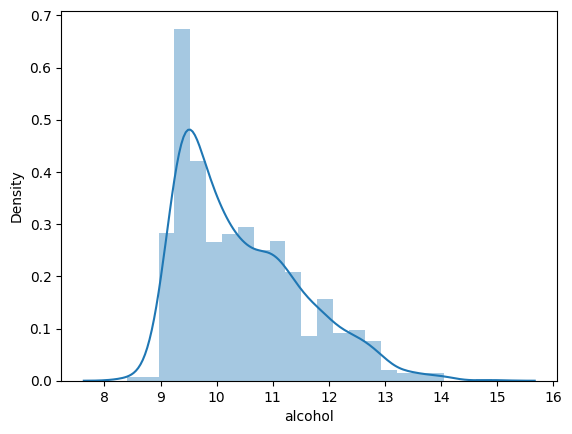

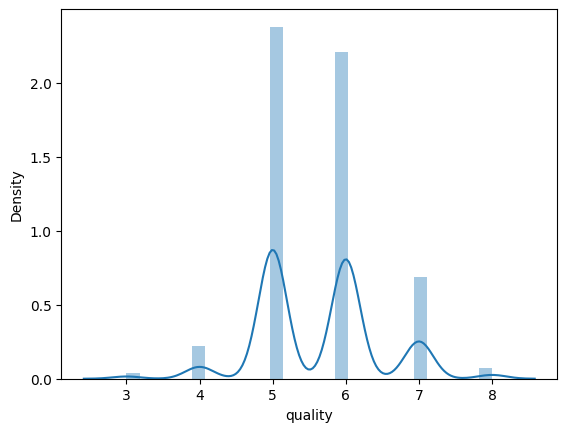

In [18]:
for i in df.columns:
  sns.distplot(df[i])
  plt.show()

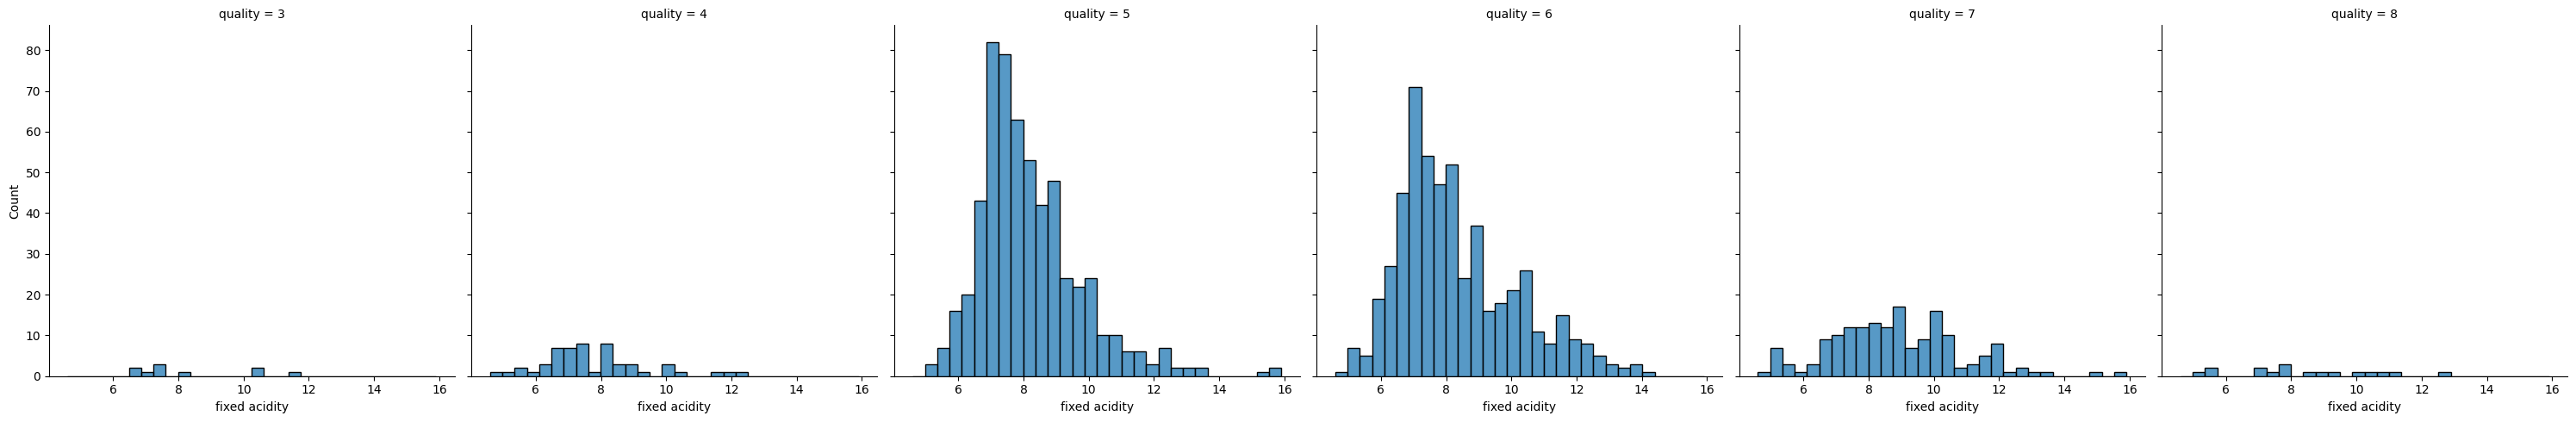

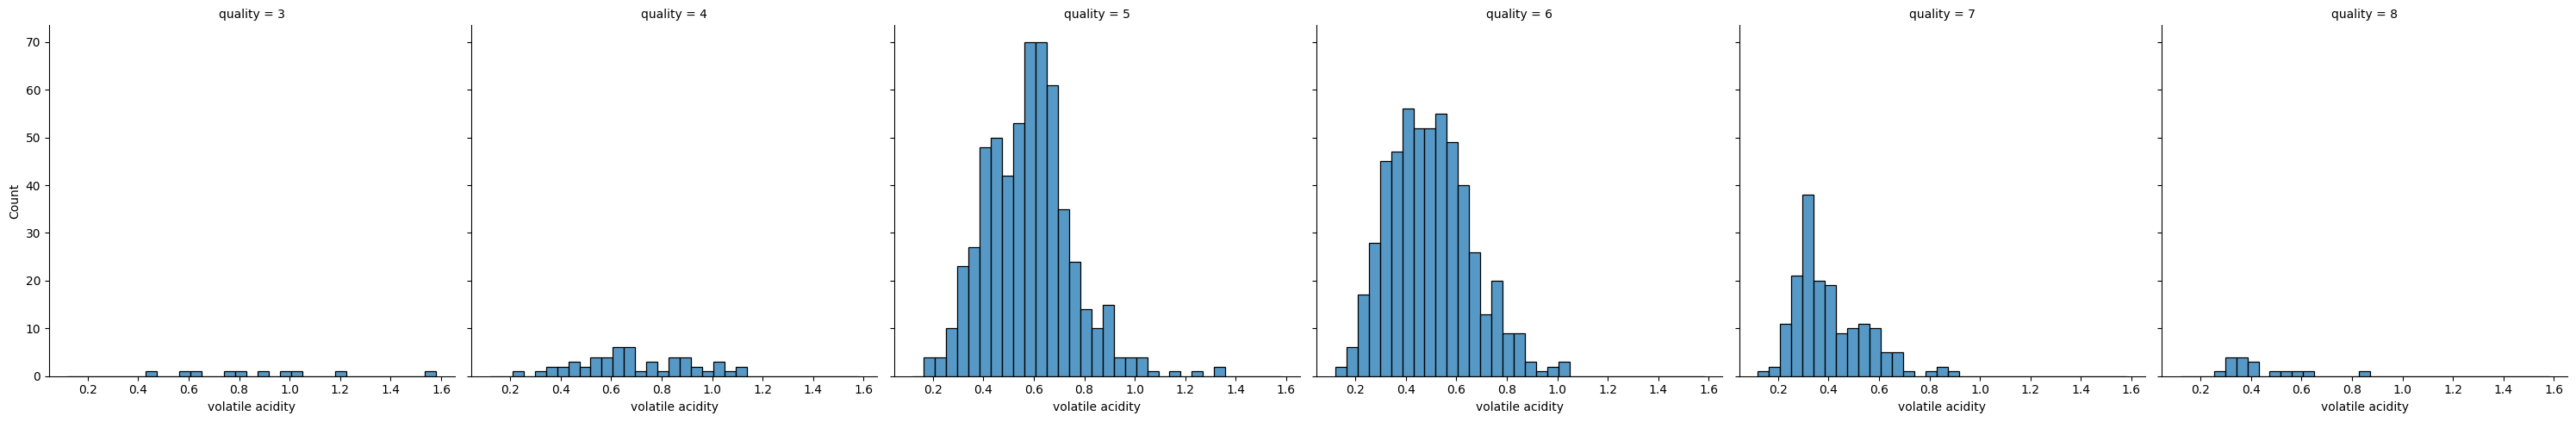

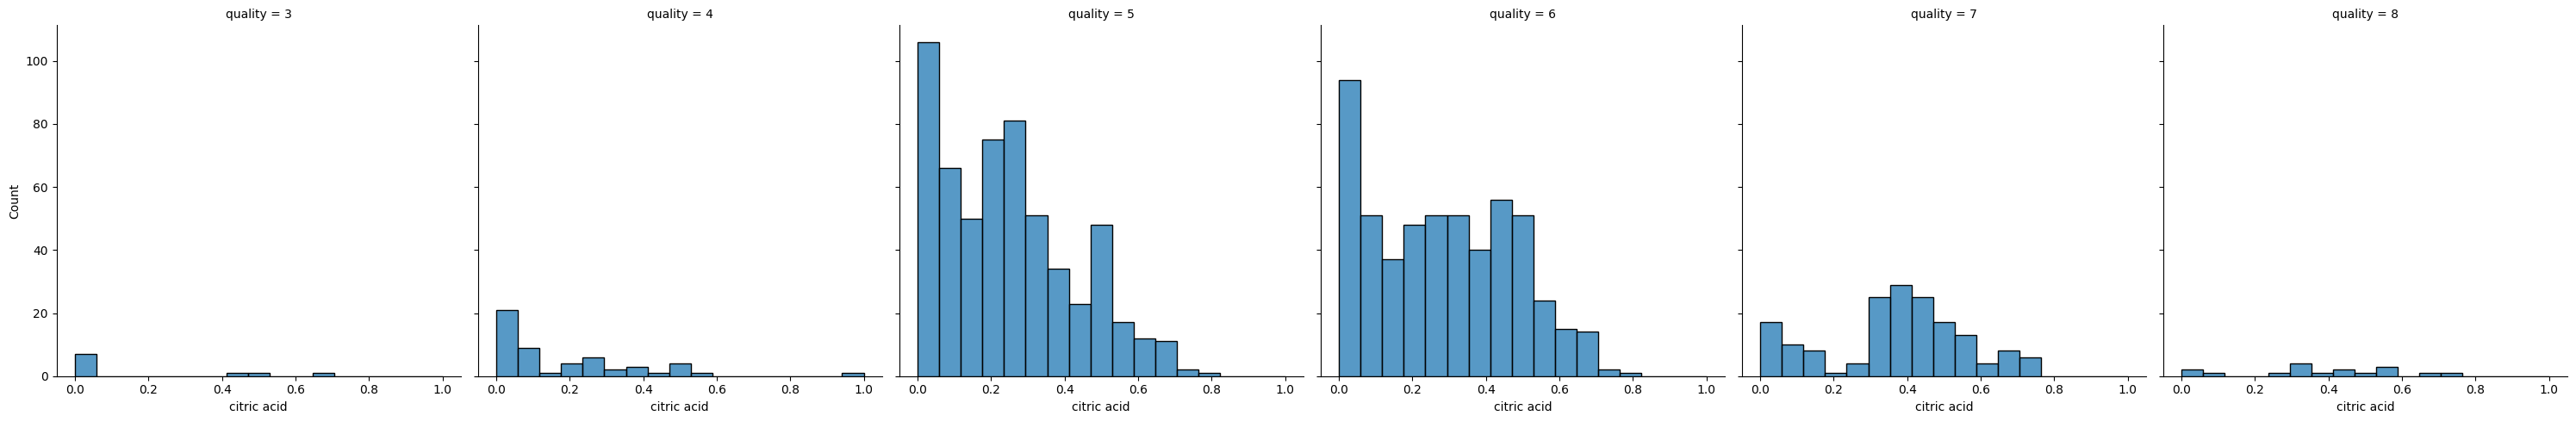

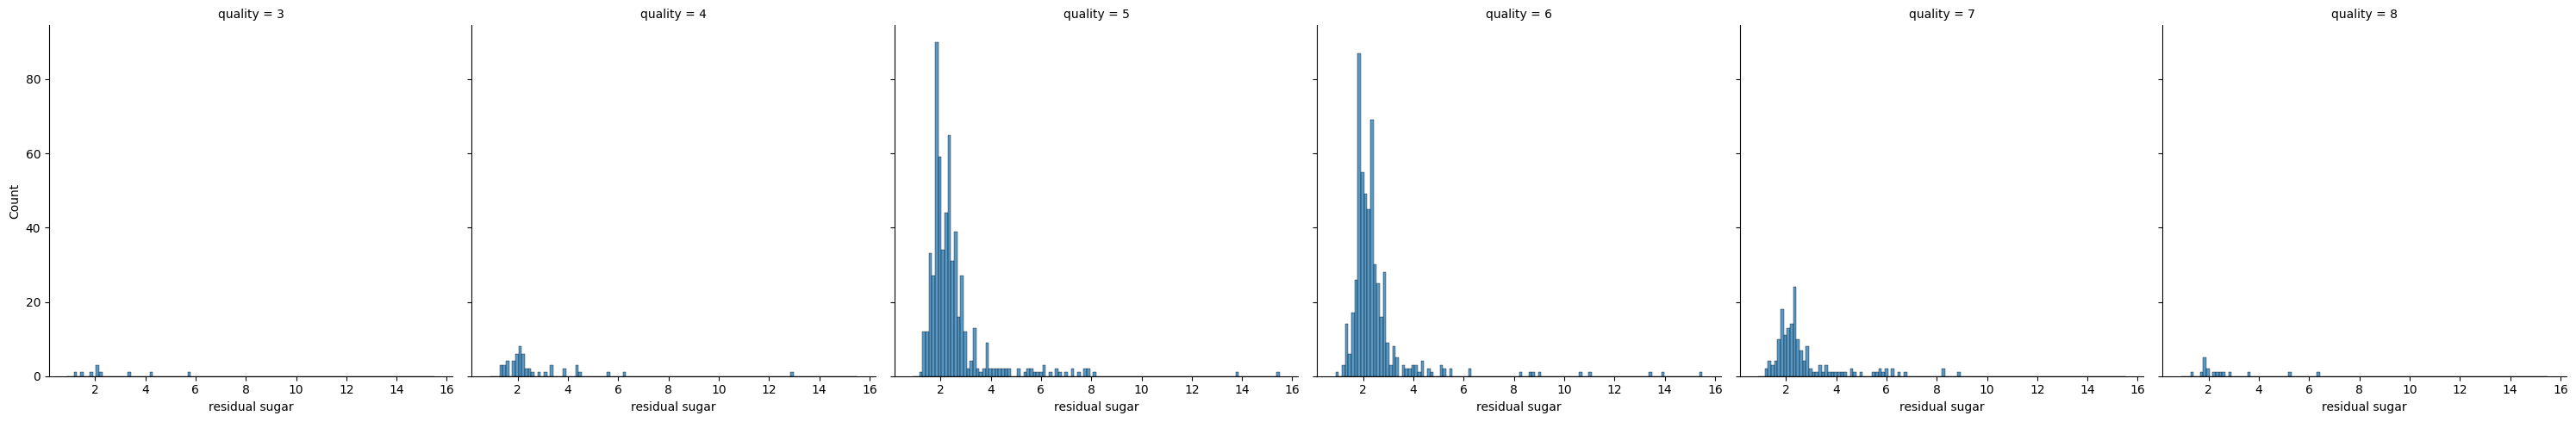

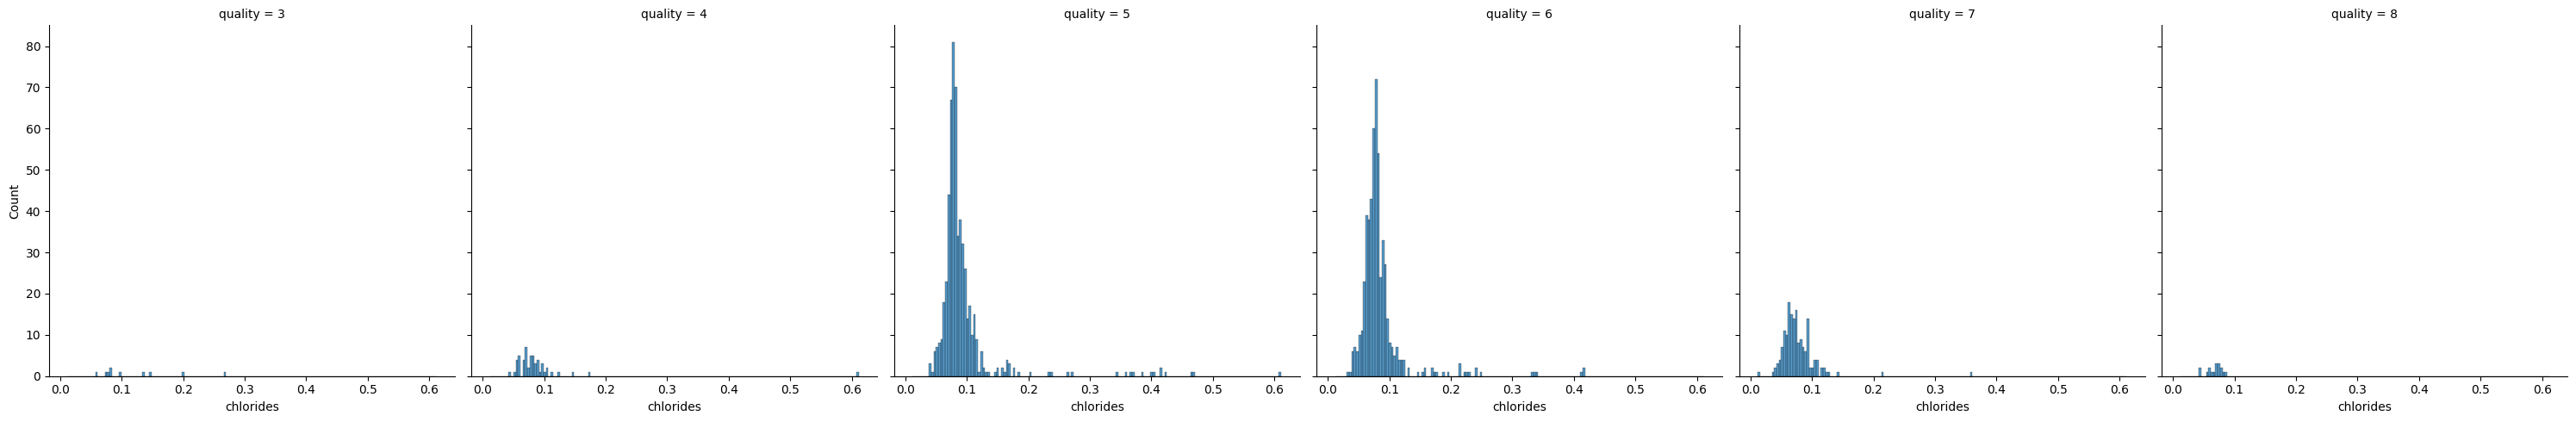

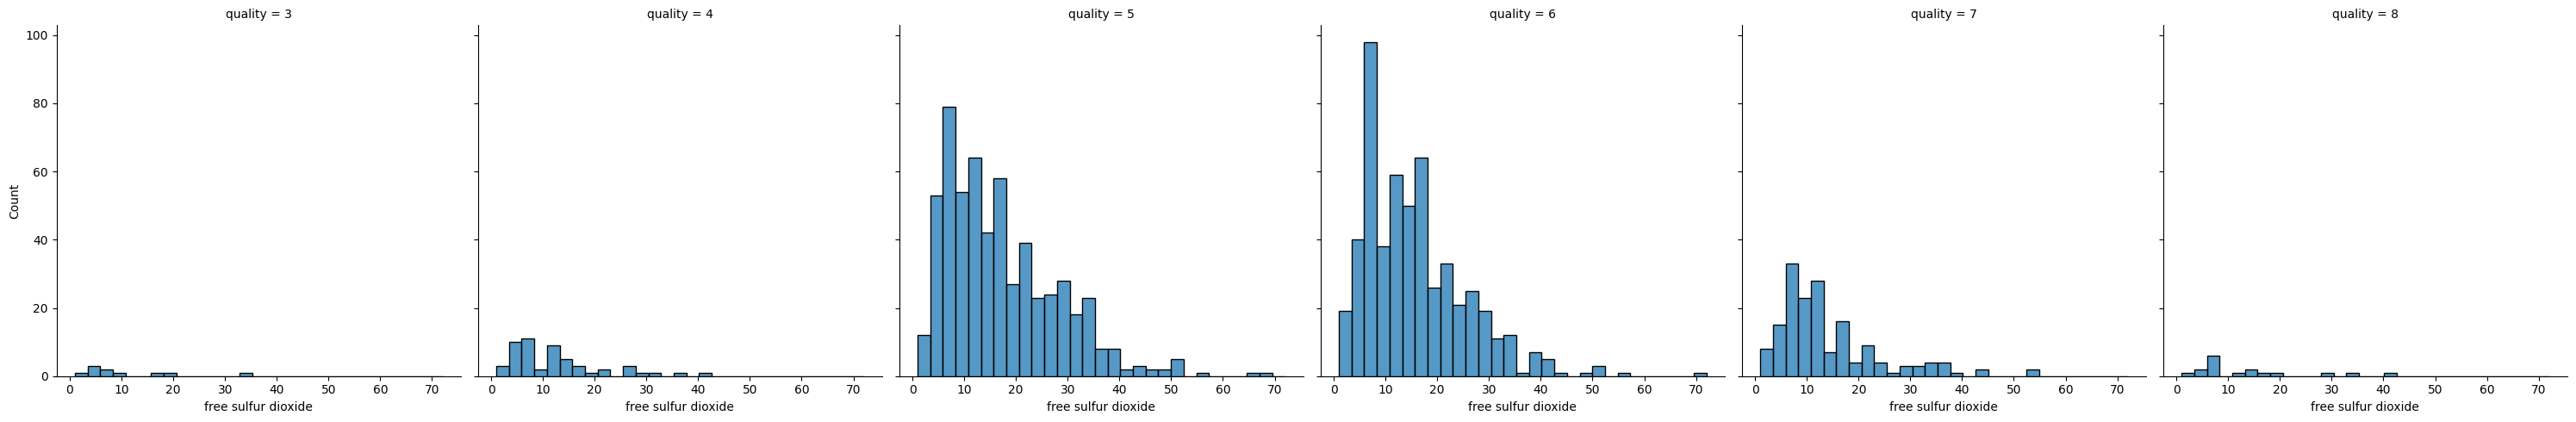

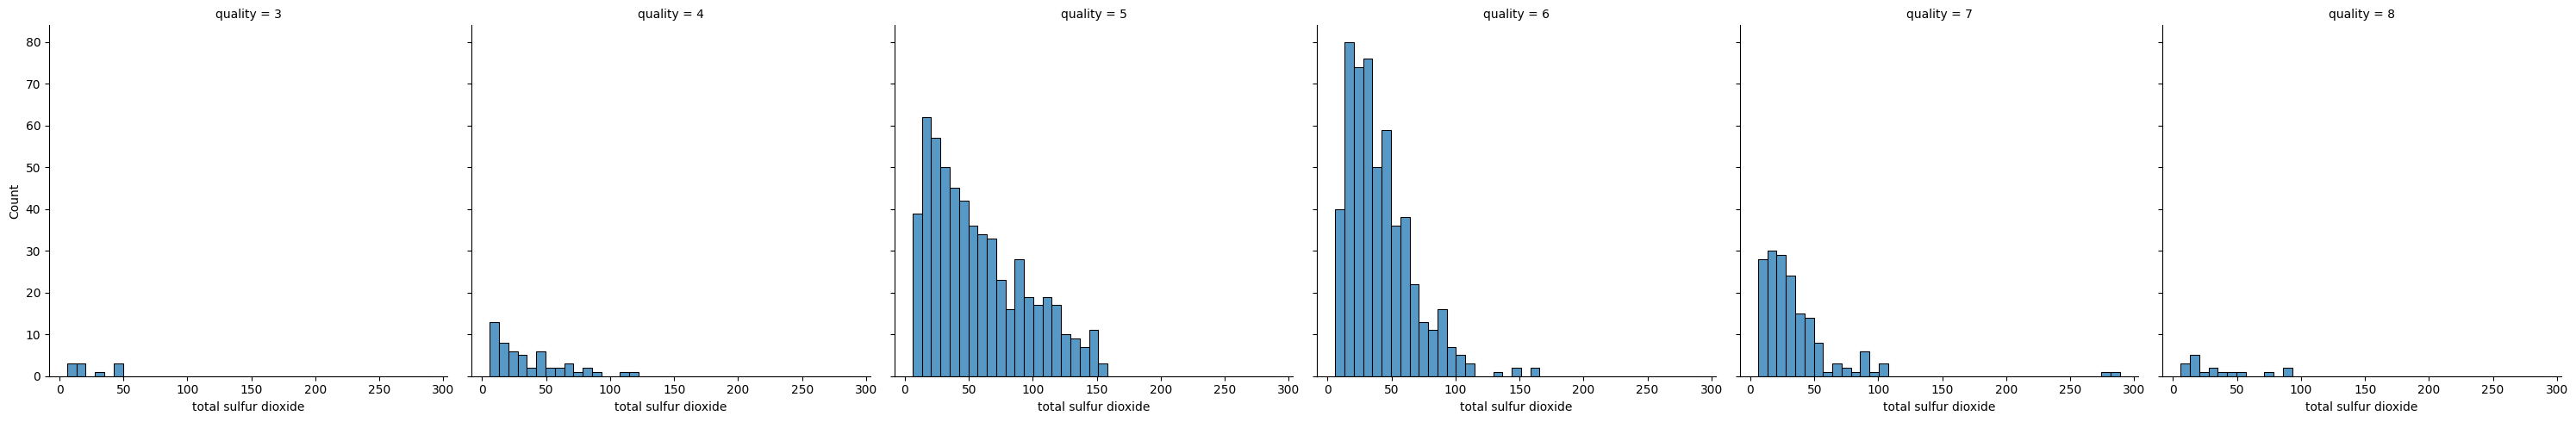

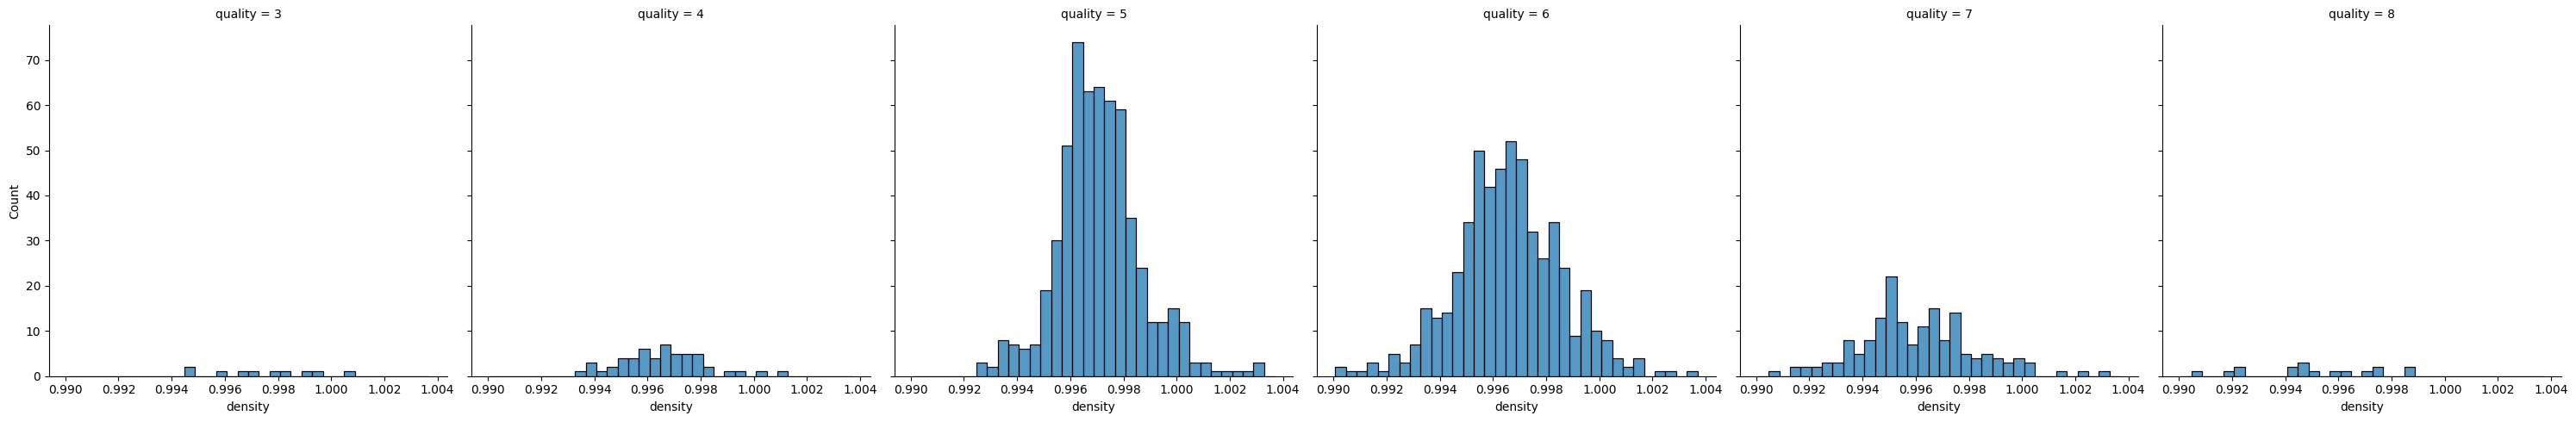

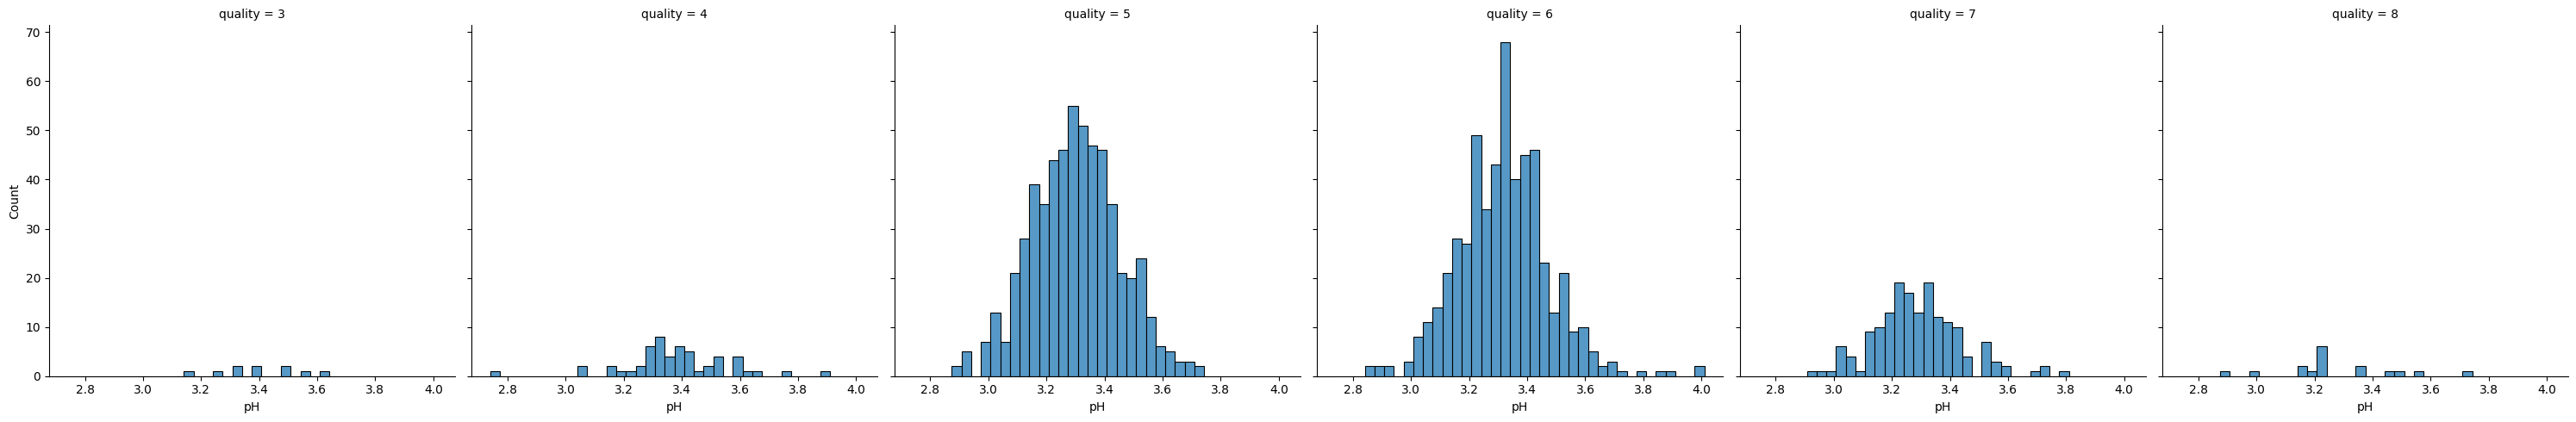

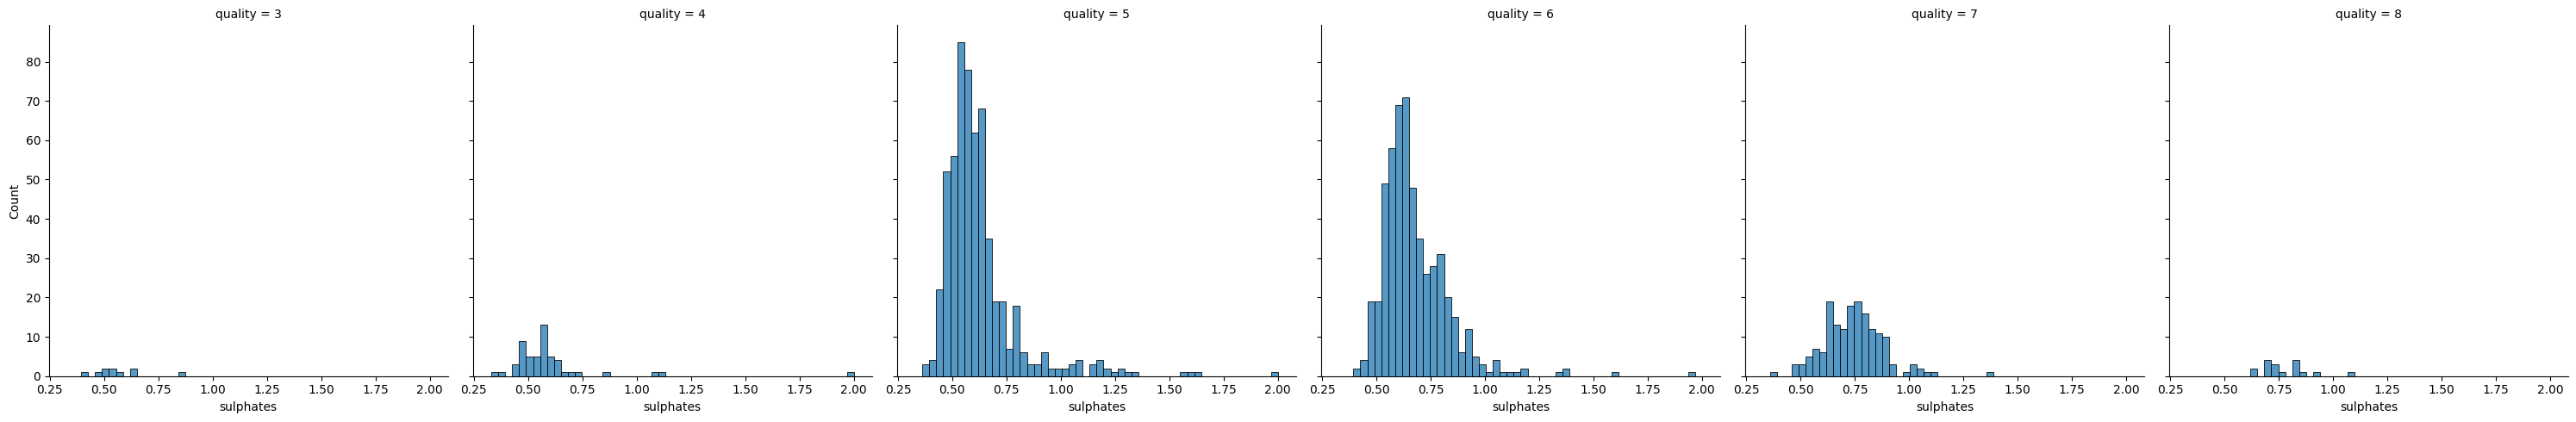

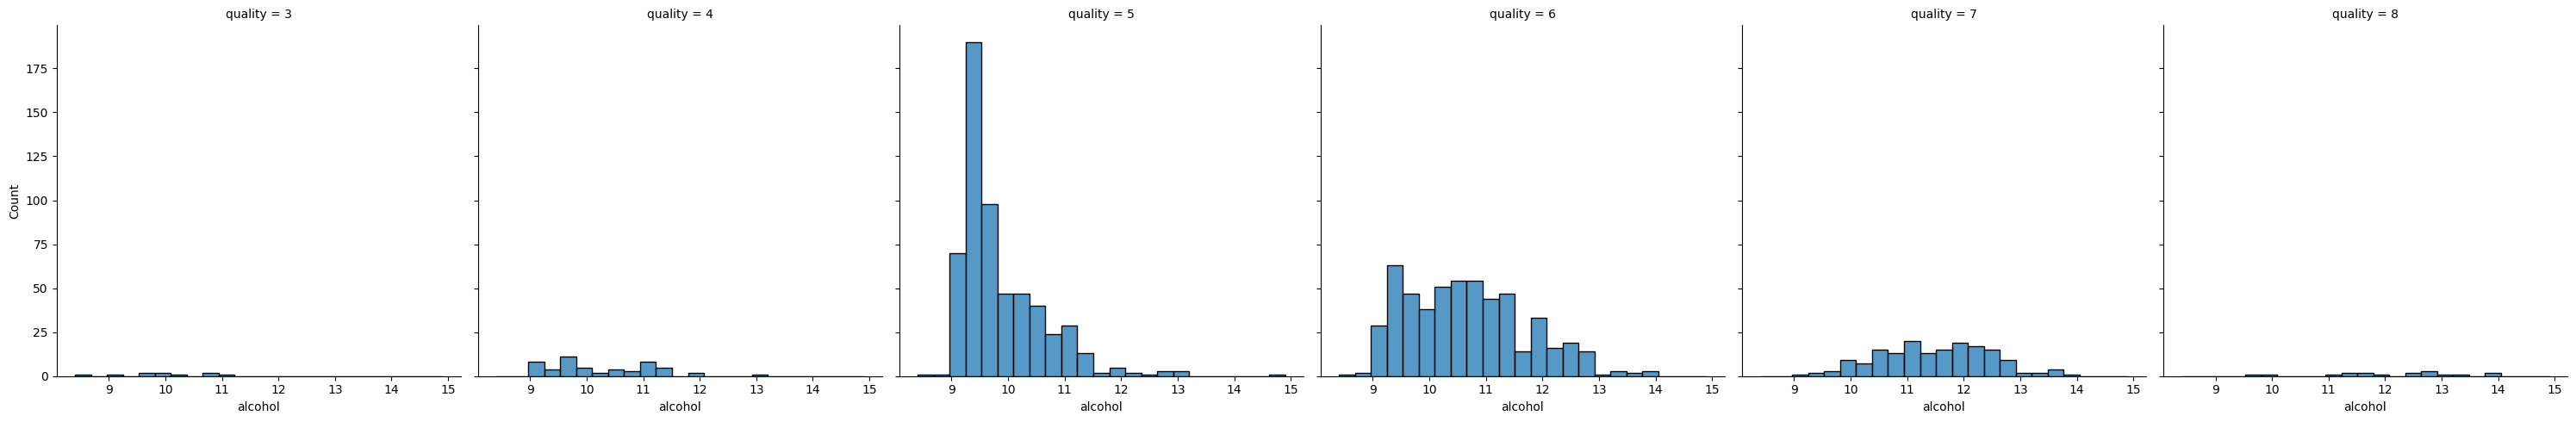

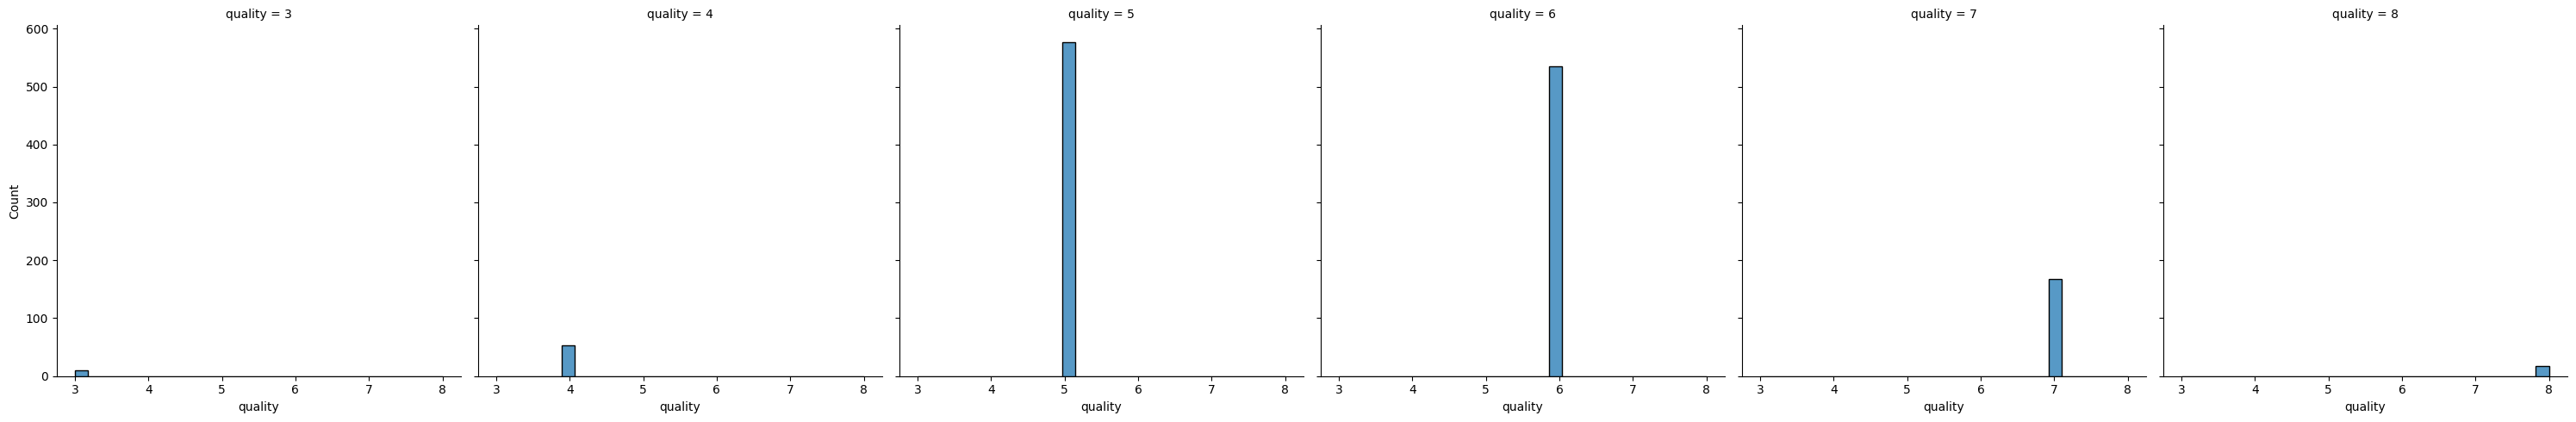

In [19]:
for i in df.columns:
  sns.displot(data=df , x=i, kind='hist',col='quality')
plt.show()


In [20]:
df.value_counts('quality')

,count
quality,
5,577
6,535
7,167
4,53
8,17
3,10


#converting into binary problem

In [21]:
wine_dataset=df.copy()
wine_dataset['quality'] = wine_dataset['quality'].apply(lambda x: 1 if x<=5 else 0)

In [22]:
wine_dataset.value_counts('quality')

,count
quality,
0,719
1,640


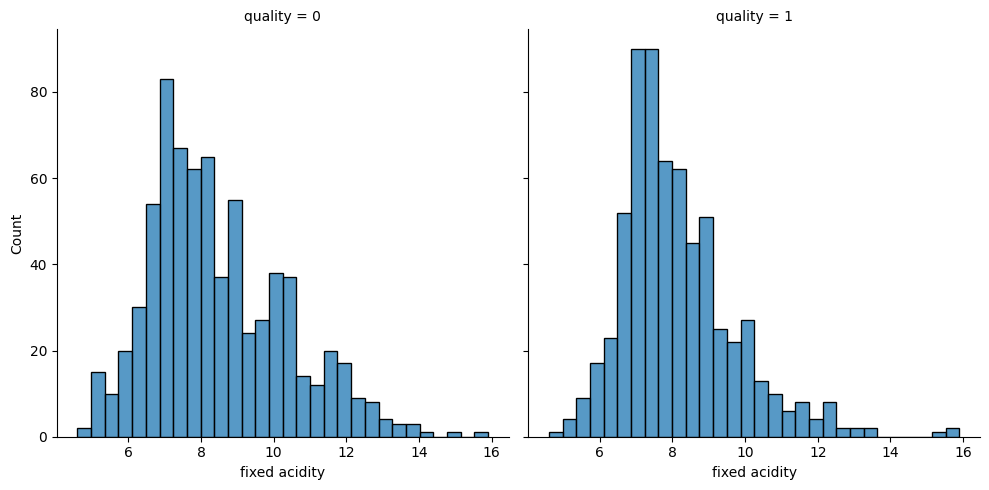

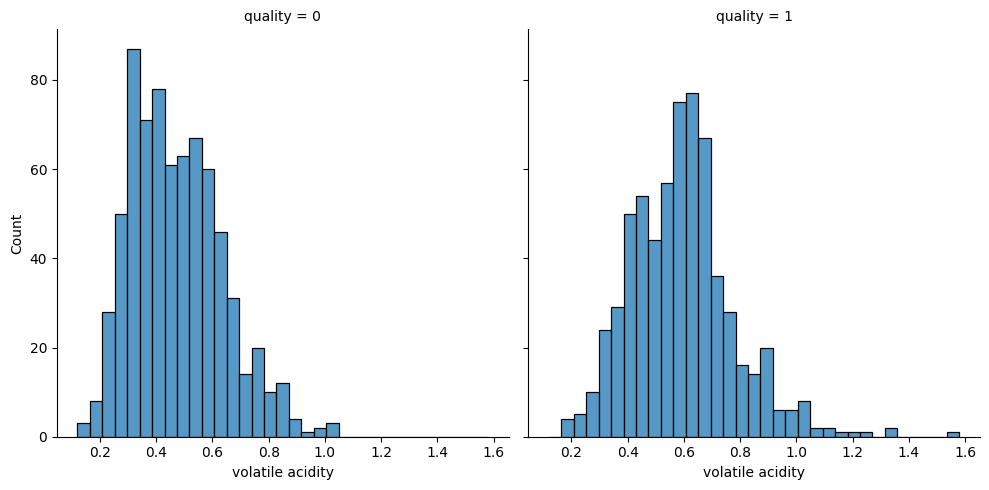

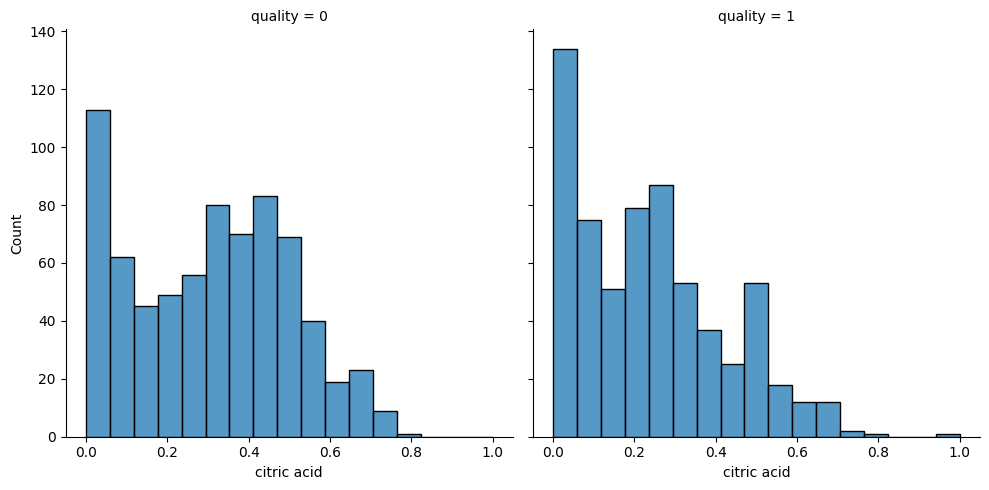

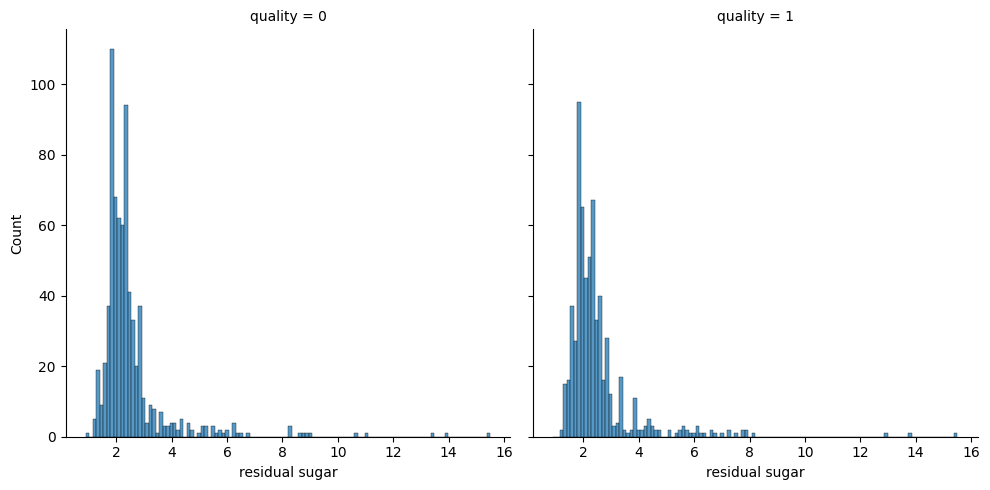

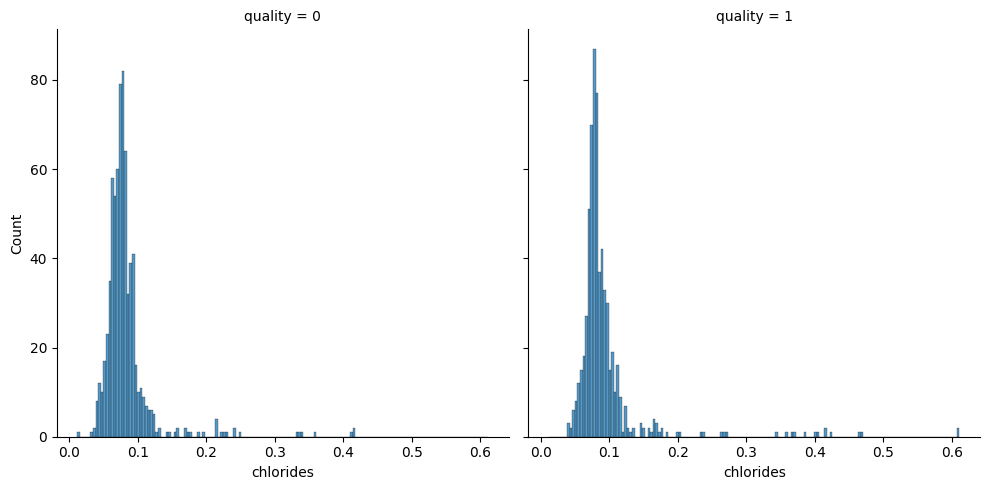

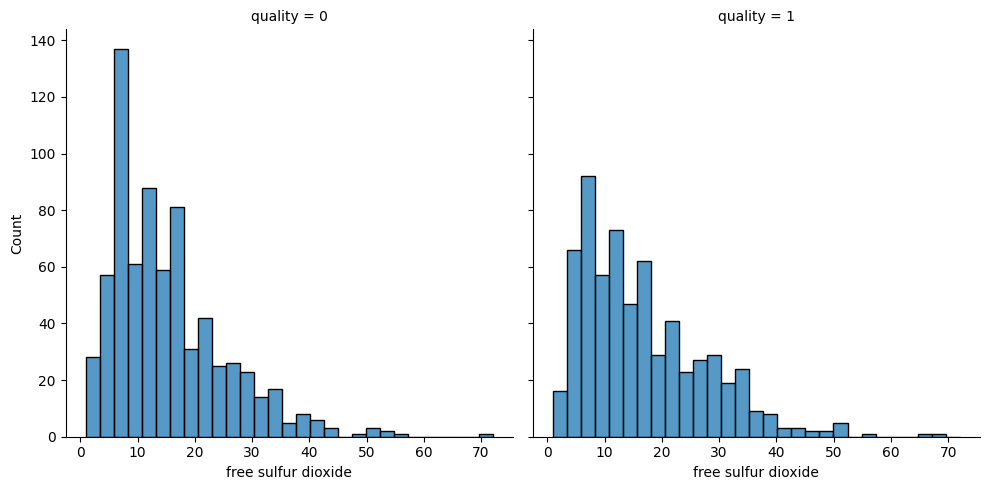

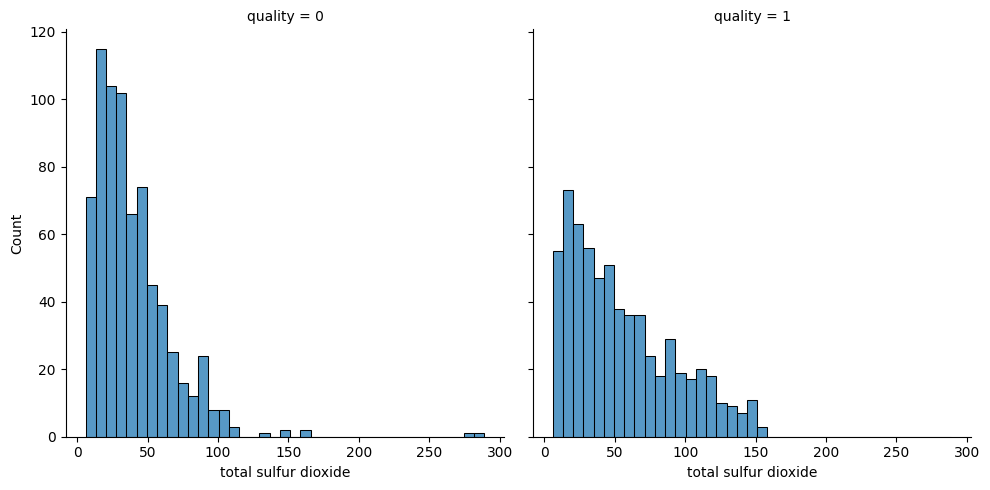

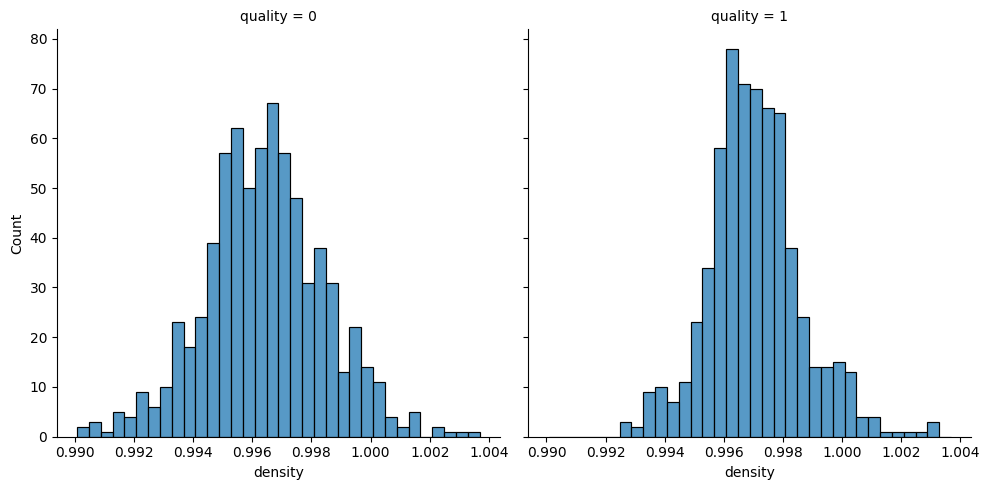

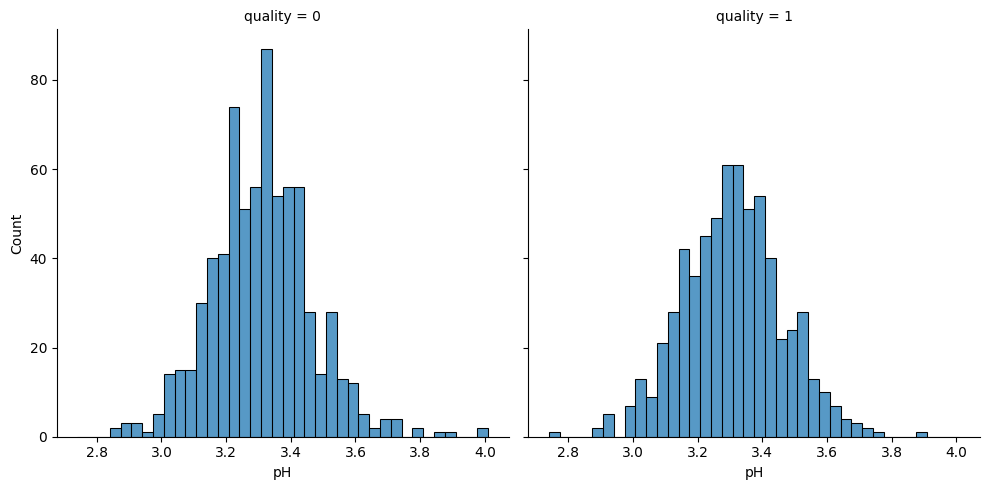

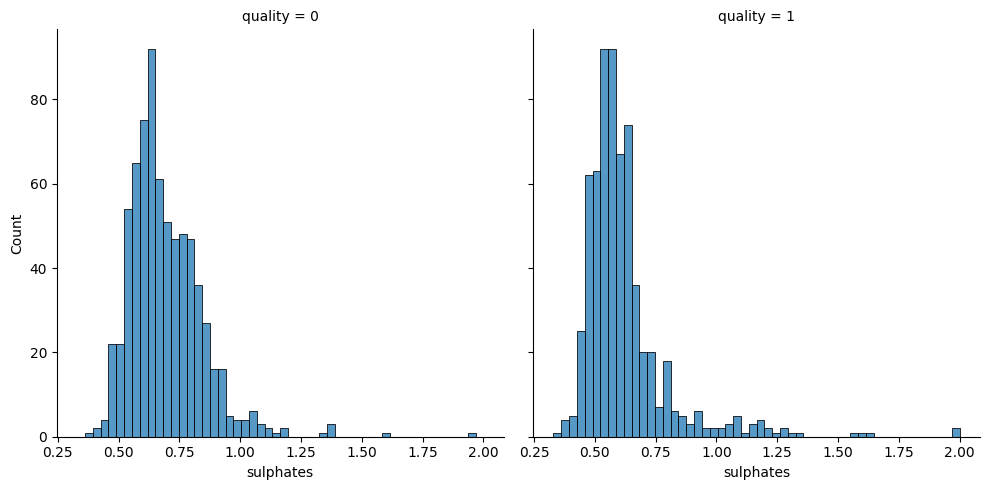

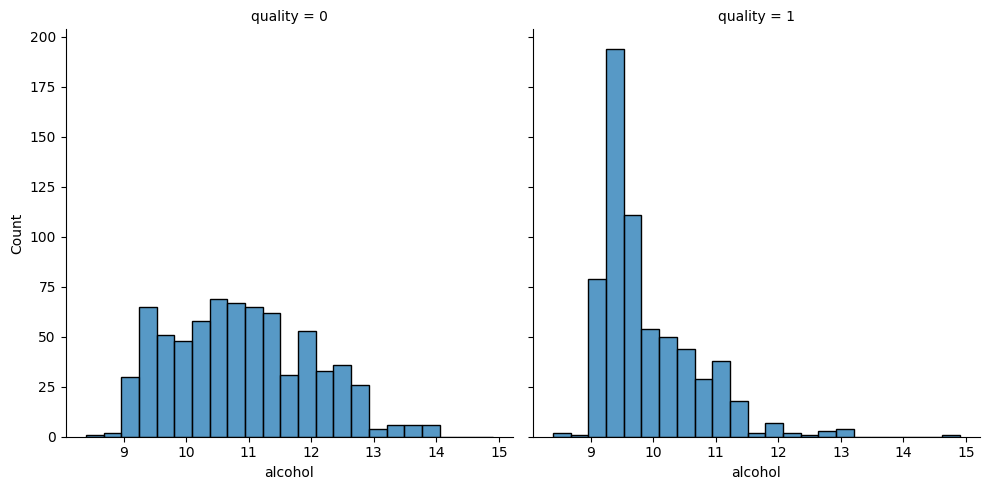

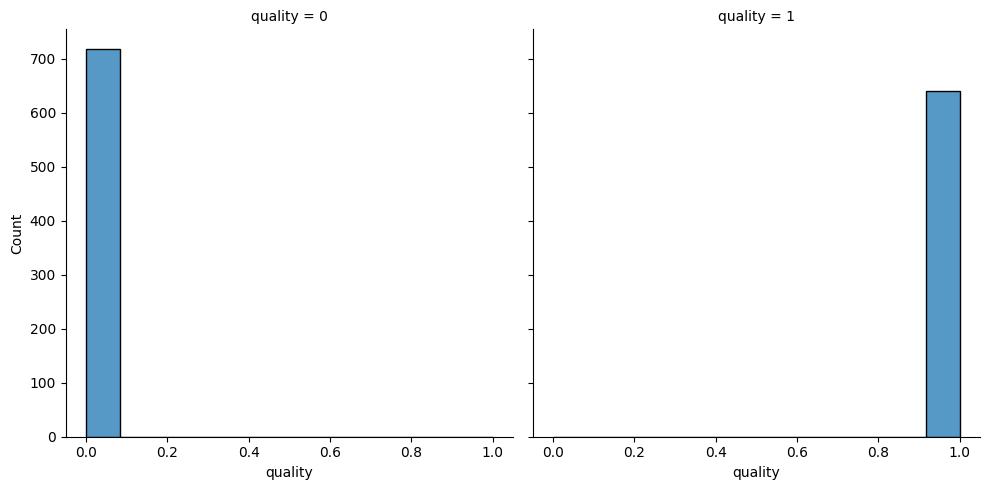

In [23]:
for i in wine_dataset.columns:
  sns.displot(data=wine_dataset , x=i, kind='hist',col='quality')
plt.show()

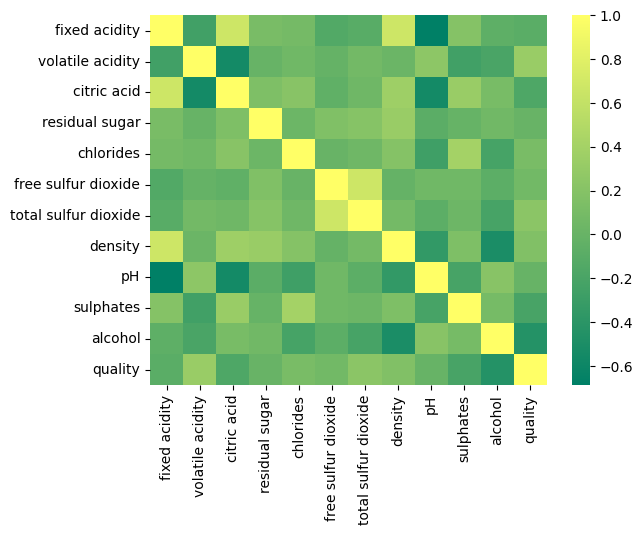

In [24]:
data=wine_dataset.corr()
sns.heatmap(data, cmap='summer')
plt.show()

#Features with high corealtion with output column.Checking outliers and deleting them

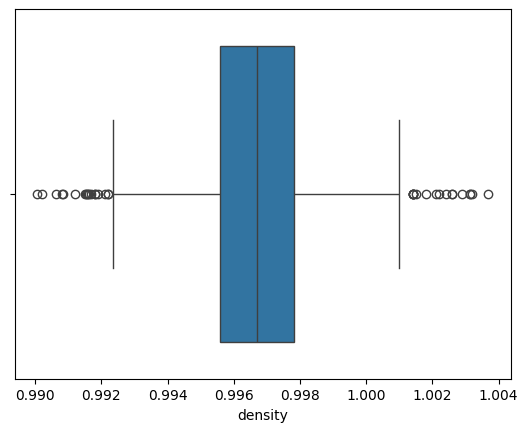

In [25]:
sns.boxplot(x='density',data=wine_dataset)
plt.show()

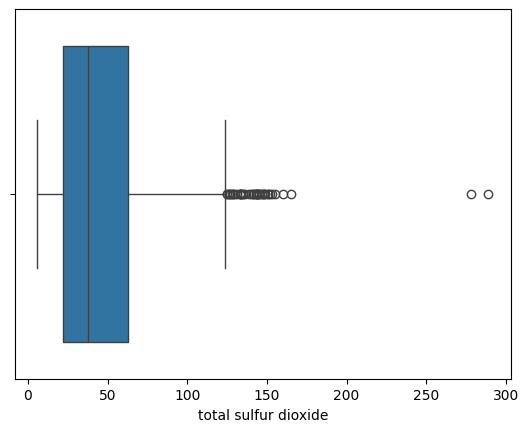

In [26]:
sns.boxplot(x='total sulfur dioxide',data=wine_dataset)
plt.show()

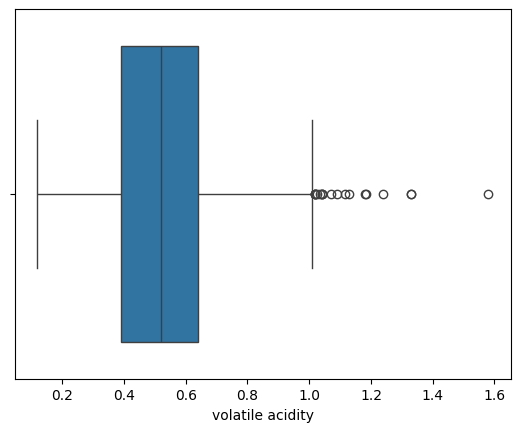

In [27]:
sns.boxplot(x='volatile acidity',data=wine_dataset)
plt.show()

In [28]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example: Remove outliers from the 'alcohol' column
wine_dataset = remove_outliers(wine_dataset, 'volatile acidity')

In [29]:
wine_dataset = remove_outliers(wine_dataset, 'density')

wine_dataset = remove_outliers(wine_dataset, 'total sulfur dioxide')


In [30]:
wine_dataset['quality'].value_counts()

,count
quality,
0,684
1,578


# Split the dataset into features (X) and target (y)

In [31]:
target_column = 'quality'


X = wine_dataset.drop(columns=[target_column])
y = wine_dataset[target_column]

In [32]:
x_pca=X.copy()
y_pca=y.copy()

# Split the data into training and test sets

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardization of columns

In [34]:
 #Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [35]:
X_test_scaled.shape

(253, 11)

In [36]:
X_train_scaled.shape

(1009, 11)

#Logistic Regression


In [37]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

In [38]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[96 34]
 [38 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       130
           1       0.71      0.69      0.70       123

    accuracy                           0.72       253
   macro avg       0.72      0.71      0.71       253
weighted avg       0.72      0.72      0.72       253


Accuracy Score:
0.7154150197628458


#PCA

In [39]:
pca = PCA(n_components=10)

# Fit and transform the data to the PCA space
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [40]:
explained_variance = pca.explained_variance_ratio_

In [41]:
print(f'Total explained variance: {explained_variance.sum()}')

Total explained variance: 0.9941718467806421


#Logistic regression

In [42]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_pca = log_reg.predict(X_test_pca)

In [43]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_pca))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_pca))

Confusion Matrix:
[[97 33]
 [36 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       130
           1       0.72      0.71      0.72       123

    accuracy                           0.73       253
   macro avg       0.73      0.73      0.73       253
weighted avg       0.73      0.73      0.73       253


Accuracy Score:
0.7272727272727273


#Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train_pca, y_train)

# Predict on the test data
y_pred_dt = dt_classifier.predict(X_test_pca)

In [45]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_dt))





Confusion Matrix:
[[79 51]
 [58 65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       130
           1       0.56      0.53      0.54       123

    accuracy                           0.57       253
   macro avg       0.57      0.57      0.57       253
weighted avg       0.57      0.57      0.57       253


Accuracy Score:
0.5691699604743083


In [46]:
from xgboost import XGBClassifier
#Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model on the training data
xgb_classifier.fit(X_train_pca, y_train)

# Predict on the test data
y_pred_xg = xgb_classifier.predict(X_test_pca)
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_xg))


Accuracy Score:
0.7075098814229249


In [49]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_pca, y_train)
y_pred_svm = svm_classifier.predict(X_test_pca)
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svm))


Accuracy Score:
0.7312252964426877


SVC with rbf classifier provide accuracy of 73%